<a href="https://colab.research.google.com/github/lumagri/Python_to_Data_Science/blob/main/6_Estatistica_com_Python_Frequencias_e_Medidas/Projeto_Ana%CC%81lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [ ]:
dados_ibge = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [ ]:
dados_ibge

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [ ]:
dados_ibge.Renda.max()

200000

In [ ]:
#criar classes
classes = [0, 2000, 5000, 15000, 25000, 200000]

### 2º Definir os labels das classes

In [ ]:
#criar labels
classe_social = ['E ► De 0 a 2 SM', 'D ► De 2 a 5 SM', 'C ► De 5 a 15 SM', 'B ► De 15 a 25 SM', 'A ► Acima de 25 SM']
classe_social

['E ► De 0 a 2 SM',
 'D ► De 2 a 5 SM',
 'C ► De 5 a 15 SM',
 'B ► De 15 a 25 SM',
 'A ► Acima de 25 SM']

In [ ]:
classe_social = pd.Series(classe_social)
classe_social.name='Classe social'
classe_social

0       E ► De 0 a 2 SM
1       D ► De 2 a 5 SM
2      C ► De 5 a 15 SM
3     B ► De 15 a 25 SM
4    A ► Acima de 25 SM
Name: Classe social, dtype: object

### 3º Construir a coluna de frequências

In [ ]:
dados_ibge[['Renda']].head(10) #Para visualizar apenas dados de Renda

,Renda
0,800
1,1150
2,880
3,3500
4,150
5,790
6,3150
7,1700
8,1800
9,1150


In [ ]:
pd.cut(x = dados_ibge.Renda, 
       bins = classes, 
       labels= classe_social, 
       include_lowest=True).head(10) # classificado em faixas etárias
#comparar com os valores da tabela de cima, verificar se as classes estão certas

0    E ► De 0 a 2 SM
1    E ► De 0 a 2 SM
2    E ► De 0 a 2 SM
3    D ► De 2 a 5 SM
4    E ► De 0 a 2 SM
5    E ► De 0 a 2 SM
6    D ► De 2 a 5 SM
7    E ► De 0 a 2 SM
8    E ► De 0 a 2 SM
9    E ► De 0 a 2 SM
Name: Renda, dtype: category
Categories (5, object): ['E ► De 0 a 2 SM' < 'D ► De 2 a 5 SM' < 'C ► De 5 a 15 SM' <
                         'B ► De 15 a 25 SM' < 'A ► Acima de 25 SM']

In [ ]:
frequencia = pd.value_counts(pd.cut(x = dados_ibge.Renda, 
       bins = classes, 
       labels= classe_social, 
       include_lowest=True))
frequencia

E ► De 0 a 2 SM       58474
D ► De 2 a 5 SM       13635
C ► De 5 a 15 SM       4110
B ► De 15 a 25 SM       452
A ► Acima de 25 SM      169
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [ ]:
percentual = pd.value_counts(pd.cut(x = dados_ibge.Renda, 
       bins = classes, 
       labels= classe_social, 
       include_lowest=True),
       normalize = True) *100 
percentual

E ► De 0 a 2 SM       76.098386
D ► De 2 a 5 SM       17.744664
C ► De 5 a 15 SM       5.348777
B ► De 15 a 25 SM      0.588235
A ► Acima de 25 SM     0.219938
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [ ]:
classe_social = pd.DataFrame({'Classe Social': classe_social})
classe_social

,Classe Social
0,E ► De 0 a 2 SM
1,D ► De 2 a 5 SM
2,C ► De 5 a 15 SM
3,B ► De 15 a 25 SM
4,A ► Acima de 25 SM


In [ ]:
freq_porc_tabela =  pd.DataFrame(
    {'Frequencia': frequencia, 'Porcentagem(%)':percentual}) 
freq_porc_tabela

,Frequencia,Porcentagem(%)
E ► De 0 a 2 SM,58474,76.098386
D ► De 2 a 5 SM,13635,17.744664
C ► De 5 a 15 SM,4110,5.348777
B ► De 15 a 25 SM,452,0.588235
A ► Acima de 25 SM,169,0.219938


In [ ]:
freq_porc_tabela = freq_porc_tabela.sort_index(ascending = False)
freq_porc_tabela 
# Não consegui manter o nome no index de classe social. =<

,Frequencia,Porcentagem(%)
A ► Acima de 25 SM,169,0.219938
B ► De 15 a 25 SM,452,0.588235
C ► De 5 a 15 SM,4110,5.348777
D ► De 2 a 5 SM,13635,17.744664
E ► De 0 a 2 SM,58474,76.098386


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


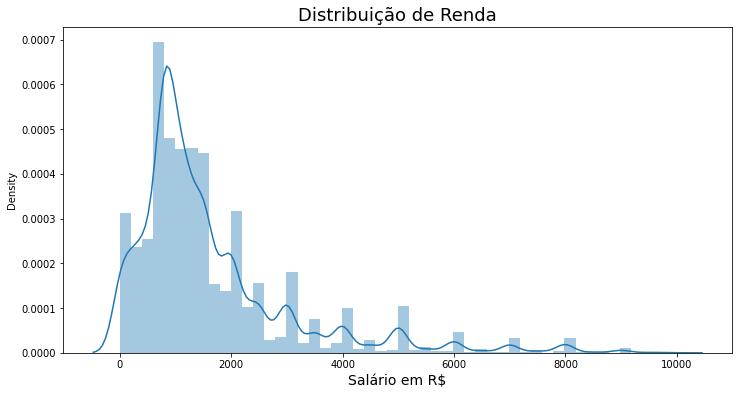

In [ ]:
ax = sns.distplot(dados_ibge.query('Renda < 10000').Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Renda', fontsize = 18)
ax.set_xlabel('Salário em R$', fontsize = 14)
ax

> ### Conclusões

76% das familias brasileiras ganham até R$2.000,00 em 2015; 

98% das famílias brasileiras recebem até R$15,000,00 classificados em classe C. 

Famílias de classe A e B juntas não chegam a representar 1% da população brasileira. 


### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


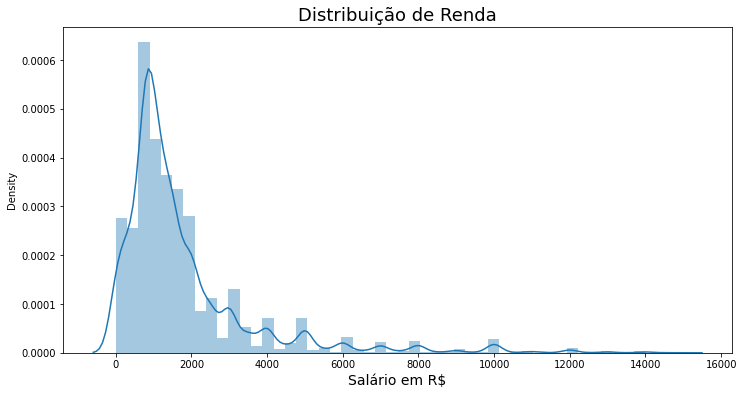

In [ ]:
#Variáveis quantitativas (Distribuição de Renda)
ax = sns.distplot(dados_ibge.query('Renda < 15000').Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Renda', fontsize = 18)
ax.set_xlabel('Salário em R$', fontsize = 14)
ax

In [ ]:
dados_ibge.Renda.mode()

0    788
dtype: int64

In [ ]:
dados_ibge.Renda.mean()

2000.3831988547631

In [ ]:
dados_ibge.Renda.median()

1200.0

> ### Conclusões

Os dados de distribuição de renda apresenta uma assimetria à direita. Isso representa menor distribuição, menores salários para a maior parte da população brasileira. A Moda é apresentada pelo valor de 1 salário mínimo --> R$788,00 

A media do salário é pouco mais que 2 salários mínimos --> R$2000,38. 

Desta forma a mediana é de R$1200,00 enquanto menos que 1% da população brasileira se encontra dentro das classes A e B, considerando esses valores de salário para classificação.

Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [ ]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [ ]:
sexo

{0: 'Masculino', 1: 'Feminino'}

In [ ]:
cor

{0: 'Indígena',
 2: 'Branca',
 4: 'Preta',
 6: 'Amarela',
 8: 'Parda',
 9: 'Sem declaração'}

In [ ]:
frequencia = pd.crosstab(dados_ibge.Sexo, 
                         dados_ibge.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia #renomeando as linhas e colunas

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
porcentagem = pd.crosstab(dados_ibge.Sexo, 
                         dados_ibge.Cor,
                         normalize=True) *100
porcentagem.rename(index = sexo, inplace = True)
porcentagem.rename(columns = cor, inplace = True)
porcentagem #renomeando as linhas e colunas e apresentando dados em percentuais

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> ### Conclusões

A maior parte dos homens e mulheres brasileiros se declaram da cor parda, esta fração representa 47% da população brasileira. 

A segunda maior fração da se autodeclara branca, tanto homens quanto mulheres, representando cerca de 41% da população brasileira. 

Há pontos importantes a serem considerados quanto a análise de comparação de gêneros pois estes dados analisaram mais que o dobro de homens do que de mulheres. Em uma análise de população total baseada em informações representada por apenas 30% das mulheres. Para análise quantitativa sobre os gêneros será importante separar por gênero. 

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [28]:
dados_ibge.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [29]:
dados_ibge.Renda.median()

1200.0

### Obtenha a moda

In [30]:
dados_ibge.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [31]:
dados_ibge.Renda.mad()

1526.4951371638058

### Obtenha a variância

In [32]:
dados_ibge.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [34]:
dados_ibge.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [38]:
Renda_Sexo_Cor = pd.crosstab(dados_ibge.Sexo, 
                         dados_ibge.Cor,
                         aggfunc={'mean', 'median', 'max'},
                         values = dados_ibge.Renda)
Renda_Sexo_Cor.rename(index = sexo, inplace = True)
Renda_Sexo_Cor.rename(columns = cor, inplace = True)
Renda_Sexo_Cor


#Esta função aggfunc permite agregar funções e neste caso a leitura dos dados sobre renda é a média da renda de homens e mulheres em cada uma das etnias. 

max                                               mean  \
Cor        Indígena    Branca    Preta  Amarela     Parda     Indígena   
Sexo                                                                     
Masculino   10000.0  200000.0  50000.0  50000.0  100000.0  1081.710938   
Feminino   120000.0  100000.0  23000.0  20000.0   30000.0  2464.386139   

                                                                median  \
Cor             Branca        Preta      Amarela        Parda Indígena   
Sexo                                                                     
Masculino  2925.744435  1603.861687  4758.251064  1659.577425    797.5   
Feminino   2109.866750  1134.596400  3027.341880  1176.758516    788.0   

                                           
Cor        Branca   Preta Amarela   Parda  
Sexo                                       
Masculino  1700.0  1200.0  2800.0  1200.0  
Feminino   1200.0   800.0  1500.0   800.0

> ### Conclusões

Não sei se soube interpretar esses dados. Os valores de renda entre homens e mulheres são muito discrepantes. Quanto ao valor máximo e média. 

No entanto, uma possível interpretação é que a popolação branca e masculina possui os maiores salários. Quanto aos valores máximos de acordo com as etinias. Os homens parecem receber sempre o dobro do salário máximo declarado em relação ao declarado pelas mulheres. Mas em média os valores são cerca de 30% acima dos salários das mulheres. 

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [40]:
Renda_Sexo_Cor_2 = pd.crosstab(dados_ibge.Sexo, 
                         dados_ibge.Cor,
                         aggfunc={'mad', 'var', 'std'},
                         values = dados_ibge.Renda)
Renda_Sexo_Cor_2.rename(index = sexo, inplace = True)
Renda_Sexo_Cor_2.rename(columns = cor, inplace = True)
Renda_Sexo_Cor_2

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    std                                                     \
Cor            Indígena       Branca        Preta     Amarela        Parda   
Sexo                                                                         
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

> ### Conclusões

O desvio médio absoluto é bem elevado, isso nos permite entender que a variação média dos salários de acordo com a etinia também é elevado. 
Essa informação fica evidente quando analisamos a própria variancia e o desvio padrão. 

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats



### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...